# Analysis of consecutive strikeouts throughout MLB history

- toc: false
- badges: true
- comments: false
- categories: [sports, data science]
- image: 

## Motivation
On 09/17/2019, Yu Darvish recorded eight consecutive strikeouts for the Chicago Cubs. The game announcers hailed this as an incredible streak, and noted that the all-time MLB record is ten consecutive strikeouts by Tom Seaver in 1970. Given that one of the most significant changes in baseball over the past several decades is the increase in strikeout rate, I was curious to find out how much more likely such an occurrence is today versus, say, 50 years ago. In the end, I find that occurence of K streaks is growing exponentially, and Seaver's feat was roughly **1,164 times less likely** than Darvish's.

Plotting the 'K rate' above, we can see that strikeouts have become much more common over the last 100 years.

In [27]:
#collapse-hide
import pandas as pd
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

raw_stats = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/fan_graphs_sp_data.csv'
cols_to_use = ['Season', 'GS', 'IP', 'H', 'BB', 'HBP', 'SO']
# drop 2020 due to shortened season
sp_data_fg = pd.read_csv(raw_stats, usecols=cols_to_use, index_col='Season').rename(columns={'SO' : 'K'}).drop(2020)
sp_data_fg['BF_est'] = sp_data_fg.IP*3 + sp_data_fg.H + sp_data_fg.BB + sp_data_fg.HBP
sp_data_fg['BF_per_start_est'] = sp_data_fg.BF_est/sp_data_fg.GS
sp_data_fg['K_rt_SP'] = sp_data_fg.K/sp_data_fg.BF_est
sp_data_fg
# this is a limited approximation bc of RPs

,GS,H,BB,IP,HBP,K,BF_est,BF_per_start_est,K_rt_SP
Season,,,,,,,,,
1900,1131,10711,2942,9743.00,516,2643,43398.00,38.37,0.06
1901,2217,20819,5420,19457.10,874,6954,85484.30,38.56,0.08
1902,2225,20144,5367,19559.20,761,6595,84949.60,38.18,0.08
1903,2226,19640,5390,19532.20,750,7923,84376.60,37.91,0.09
1904,2492,20174,5676,21830.00,800,9250,92140.00,36.97,0.10
...,...,...,...,...,...,...,...,...,...
2015,4858,28040,8518,28223.10,1040,23218,122267.30,25.17,0.19
2016,4856,27452,9004,27412.20,993,23619,119685.60,24.65,0.20
2017,4860,26919,9330,26787.10,1040,23691,117650.30,24.21,0.20


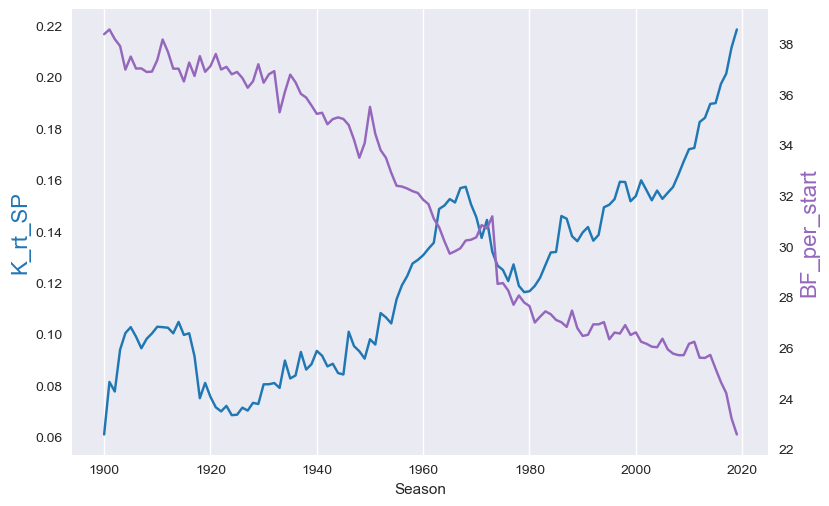

In [60]:
#collapse-hide
import matplotlib as plt
# plt.rcdefaults()
plt.style.use('seaborn')
ax = sp_data_fg.plot(y='K_rt_SP', legend=None, color='tab:blue');
ax.set_ylabel('K_rt_SP', fontsize=16, color='tab:blue');
ax.grid(b=False, axis='y')
ax2 = ax.twinx();
sp_data_fg.plot(y='BF_per_start_est', ax=ax2, legend=None, color='tab:purple');
ax2.set_ylabel('BF_per_start', fontsize=16, color='tab:purple');
ax2.grid(b=False, axis='y')

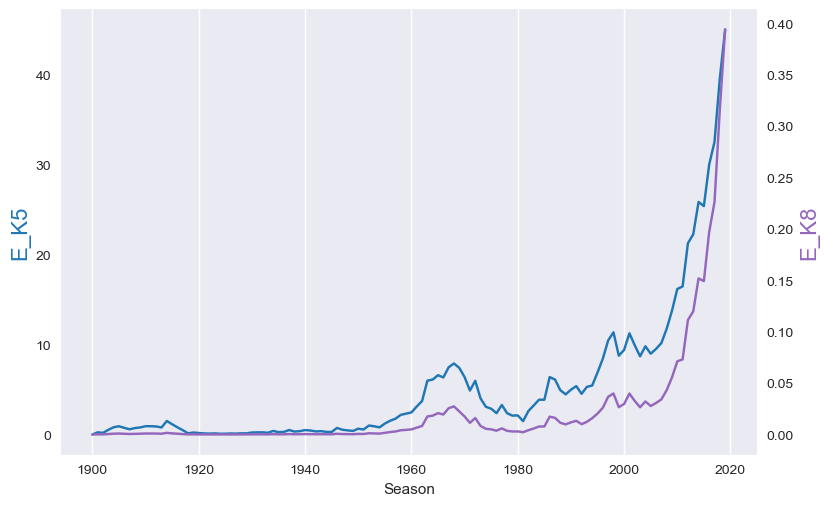

In [64]:
#collapse-hide
sp_data_fg['E_K5'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-4)*sp_data_fg.K_rt_SP**5
sp_data_fg['E_K8'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-7)*sp_data_fg.K_rt_SP**8
sp_data_fg['E_K10'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-9)*sp_data_fg.K_rt_SP**10

ax = sp_data_fg.plot(y='E_K5', legend=None, color='tab:blue');
ax.set_ylabel('E_K5', color='tab:blue', fontsize=16);
ax2 = ax.twinx();
sp_data_fg.plot(y='E_K8', ax=ax2, color='tab:purple', legend=None);
ax2.set_ylabel('E_K8', color='tab:purple', fontsize=16);
ax.grid(b=False, axis='y'); ax2.grid(b=False, axis='y')

In [75]:
#collapse-hide
seaver = sp_data_fg.E_K10[1970]
darvish = sp_data_fg.E_K8[2019]
K8_1970 = sp_data_fg.E_K8[1970]
print(int(darvish/seaver), round(1/K8_1970, 2), round(1/darvish, 2))

1164 57.22 2.54
